## This is my analysis of the modularity statistic 

First on subsets of a randomized graphs of varying length and then on the datasets given in HW assignment 

1. Assessing whether statistic determined in part a quantifying modularity depends on the number of nodes in a given set:

In [1]:
# importing relevant packages here:
import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx import Graph
import networkx.algorithms.community as nx_comm
from random import sample
import csv
import pandas as pd



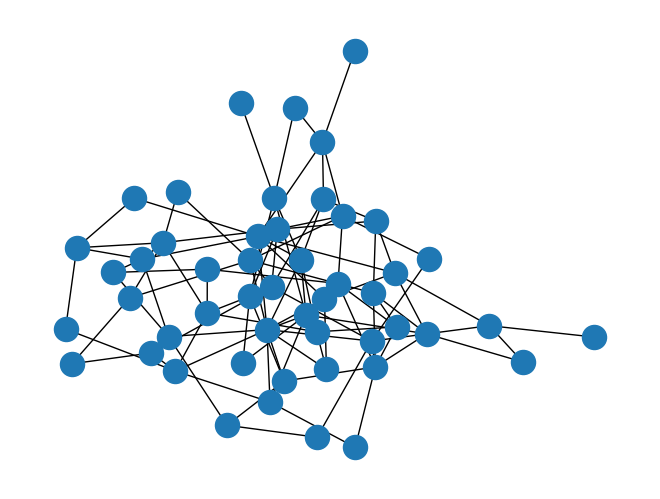

In [2]:
# Generating a random unidirected network to use in # of nodes, modularity correlation plot:

random_graph = nx.gnm_random_graph(50, 100, seed=None, directed=False)
nx.draw(random_graph)
plt.xlabel("this is the random graph with 50 nodes and 100 edges")
plt.show()


Generating Random Subsets:

In [3]:
#this function takes a graph, and a community size and generates the random partition 
def random_subsets(G, size):
    # subset of entire environment
    node_environment = list(range(0,G.number_of_nodes()))
    node_environment = set(node_environment)
    #create a subset of size increment
    random_community = sample(list(G.nodes()), size)
    #remove these nodes from the partition environment
    node_environment.difference_update(random_community)
    random_community = set(random_community)
    return [random_community, node_environment]

print(random_subsets(random_graph,5))


[{3, 36, 4, 41, 10}, {0, 1, 2, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49}]


Generate data for plot # of nodes in a given set vs modularity:

[-0.005000000000000058, 0.03154999999999998, -0.014450000000000037, 0.03594999999999996, -0.012199999999999996, 0.01419999999999999, -0.06245000000000006, 0.04779999999999997, -0.07205000000000003, 0.006200000000000011, -0.02720000000000003, -0.06125000000000003, -0.09005000000000002, -0.02080000000000004, 0.07194999999999999, -0.0064499999999999835, -0.02480000000000003, -0.004999999999999949, -0.02125000000000011, 0.05194999999999997, -0.021249999999999998, 0.011199999999999937, 0.008749999999999907, 0.015949999999999954, 0.0]


Text(0.5, 1.0, 'Size of Random Subset vs Modularity Calculated')

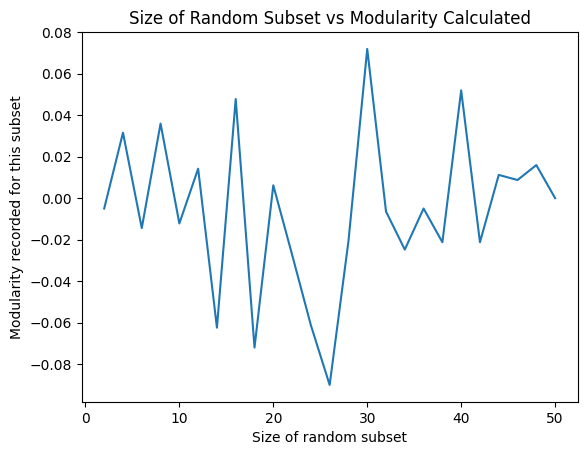

In [4]:
size = 2
community_list = []
modularity_data = []
sample_size_arr = []
while size < 52:
    sample_size_arr.append(size)
    community_list.append(random_subsets(random_graph,size))
    size = size + 2

for x in community_list:
    modularity_data.append(nx_comm.modularity(random_graph,x))

print(modularity_data)
plt.plot(sample_size_arr, modularity_data)
plt.xlabel("Size of random subset")
plt.ylabel("Modularity recorded for this subset")
plt.title("Size of Random Subset vs Modularity Calculated")


I selected these 3 diseases to analyse:
- DISGENET_Alzheimer's_Disease
- DISGENET_Presenile_dementia
- DISGENET_Mental_Depression

Obtaining the set of genes associated with each disease and processing Gene sets:

#take the header out, and remove the empty elements

In [7]:
#Obtaining the set of genes associated with each disease:
def CSV_search_genesets(disease):
    file = open('disgenet-genesets.csv')
    csvreader = csv.reader(file)
    header = next(csvreader)
    while header[0] != disease:
        header = next(csvreader)
    
    file.close()
    return header
    
Alzheimers_gene_set = CSV_search_genesets("DISGENET_Alzheimer's_Disease")
Presenile_dementia_gene_set = CSV_search_genesets("DISGENET_Presenile_dementia")
Mental_Depression_gene_set = CSV_search_genesets("DISGENET_Mental_Depression")
remove = Alzheimers_gene_set[150]

def process_gene_set(gene_set,dataset):
    gene_set.remove(remove);    
    res = []
    for x in gene_set:
        if (x != remove and x!= dataset):
            res.append(x)
    return res

Alzheimers_gene_set = process_gene_set(Alzheimers_gene_set,"DISGENET_Alzheimer's_Disease")
Presenile_dementia_gene_set = process_gene_set(Presenile_dementia_gene_set,"DISGENET_Presenile_dementia")
Mental_Depression_gene_set = process_gene_set(Mental_Depression_gene_set,"DISGENET_Mental_Depression")

print(Alzheimers_gene_set)

['A2M', 'ACHE', 'ADAM10', 'AMFR', 'BIN1', 'APOC1', 'APOE', 'APP', 'ATP5F1A', 'BAX', 'BCHE', 'BCL2', 'BDNF', 'CALM1', 'CASP3', 'CD33', 'CHRNA7', 'CHRNB2', 'CLU', 'TPP1', 'CR1', 'CRH', 'CST3', 'CYP2D6', 'ACE', 'DHCR24', 'DPYSL2', 'EIF2S1', 'ENO1', 'EPHA1', 'ESR1', 'F2', 'GSK3B', 'HFE', 'HLA-DRB5', 'HMOX1', 'IDE', 'IGF1', 'IGF1R', 'IGF2', 'IGF2R', 'IL1B', 'INS', 'INPP5D', 'INSR', 'LEP', 'MAOB', 'MAPT', 'MPO', 'MTHFR', 'NOS3', 'NPY', 'PLAU', 'PLCG2', 'PPARG', 'PRNP', 'RELN', 'PSEN1', 'PSEN2', 'PYY', 'NECTIN2', 'SLC2A4', 'SOD2', 'SORL1', 'TF', 'TFAM', 'TNF', 'TPI1', 'VEGFA', 'VSNL1', 'SLC30A4', 'PICALM', 'UNC5C', 'ADAMTS1', 'ABCA7', 'TOMM40', 'PGRMC1', 'CYP46A1', 'ARC', 'NCSTN', 'CD2AP', 'BACE1', 'GAPDHS', 'PCDH11X', 'ABI3', 'MS4A4A', 'WWOX', 'TREM2', 'SLC30A6', 'CASS4', 'IQCK', 'MIR100', 'MIR146A', 'MIR296', 'MIR375', 'MIR505', 'MIR766', 'MIR708', 'SNAR-I', 'MIR3622B', 'MIR4467']


Number of genes associated with each gene set:

In [8]:
num_Alz_genes = len(Alzheimers_gene_set)
num_Dem_genes = len(Presenile_dementia_gene_set)
num_Mental_Deprssion_genes = len(Mental_Depression_gene_set)

print("these are the respective number of genes", num_Alz_genes,num_Dem_genes,num_Mental_Deprssion_genes);


these are the respective number of genes 101 99 254


## assess the modularity of the proteins coded by the genes associated with the disease


Converting hippie-pi into an adjacency matrix
Need to partition set and generate modularities for each subset. 

## Processing hippie-ppi file

In [ ]:
# read contents of csv file
file = pd.read_csv("hippie-ppi.csv")
# adding header
headerList = ['from', 'to'] 
# converting data frame to csv
file.to_csv("hippie-ppi.csv", header=headerList, index=False) 
# display modified csv file
data= pd.read_csv("hippie-ppi.csv")
ppi = nx.from_pandas_edgelist(data, source = 'from', target = 'to');


In [8]:
print("This is the number of nodes :", ppi.number_of_nodes(), "This is the number of edges : ", ppi.number_of_edges());

This is the number of nodes : 17336 This is the number of edges :  383480


## Processing the subsets

In [9]:
def unidentifiedGene(arr):
    genes_to_remove = []
    for x in arr:
        try:
            list(ppi.nodes).index(x)
        except:
            genes_to_remove.append(x)
    return set(arr) - set(genes_to_remove)


Alzheimers_gene_set = unidentifiedGene(Alzheimers_gene_set)
Presenile_dementia_gene_set = unidentifiedGene(Presenile_dementia_gene_set)
Mental_Depression_gene_set = unidentifiedGene(Mental_Depression_gene_set)

In [10]:
def defined_subsets(G, arr):
    # subset of entire environment
    node_environment = set(G.nodes);
    node_environment = set(node_environment);
    #create a subset of size increment
    disease_associated_genes = arr;
    #remove these nodes from the partition environment
    node_environment.difference_update(disease_associated_genes)
    disease_associated_genes = set(disease_associated_genes);
    return (disease_associated_genes, node_environment);

In [11]:
#create the communities to be used for analysis
Alzheimers_subset = defined_subsets(ppi, Alzheimers_gene_set)
Presenile_dementia_subset = defined_subsets(ppi, Presenile_dementia_gene_set)
Mental_depression_subset = defined_subsets(ppi, Mental_Depression_gene_set)

In [12]:
print(len(Alzheimers_subset[0])+ len(Alzheimers_subset[1]))

17336


In [13]:
modularity_Alz = nx_comm.modularity(ppi,Alzheimers_subset)
modularity_Dem = nx_comm.modularity(ppi,Presenile_dementia_subset)
modularity_Depression = nx_comm.modularity(ppi,Mental_depression_subset)



## These are the respective modularities:

In [14]:
print("this is the modularity of Alzheimer's :", modularity_Alz,"this is the modularity of Presenile_dementia :",modularity_Dem, "this is the modularity of Mental_Depression, :", modularity_Depression)

this is the modularity of Alzheimer's : 0.0001787306385569612 this is the modularity of Presenile_dementia : 0.0001789235876670371 this is the modularity of Mental_Depression, : 0.0005537479012615556


In [15]:
valid_partition = nx_comm.kernighan_lin_bisection(ppi)
print(nx_comm.modularity(ppi,valid_partition))

0.05776851802742627


## Using Permutation Tests to test Statistical Significance

In [16]:
def random_subsets_permutation_tests(G, size):
    # subset of entire environment
    node_environment = set(G.nodes)
    #node_environment = set(node_environment);
    #create a subset of size increment
    random_community = sample(list(G.nodes()), size)
    #remove these nodes from the partition environment
    node_environment.difference_update(random_community)
    random_community = set(random_community)
    return [random_community, node_environment]

In [17]:
# generate a random set that is the same size as the Alzheimer's Data set
size = len(Alzheimers_subset[0])
sample_subset = random_subsets_permutation_tests(ppi,size)
sample_subset_modularity = nx_comm.modularity(ppi,sample_subset)
print("this is the modularity of a random subset of the ppi data set :", sample_subset_modularity)

this is the modularity of a random subset of the ppi data set : 5.305688783199557e-05


In [18]:
#generate sets of random permuations with both data sets 
def permutation_modularities(G,disease_subset, sample_subset, size, num_permutations):
    modularities = []
    merged_arr = disease_subset[0].union(sample_subset[0])
    for x in range (0,num_permutations):
        permutation = sample(merged_arr, size)
        save = defined_subsets(ppi,permutation)
        modularities.append(nx_comm.modularity(ppi,save))
    return modularities

In [19]:
def plot_modularity_diff(mod_arr, disease_modularity):
    for i in range(len(mod_arr)):
        mod_arr[i] = mod_arr[i] - disease_modularity
    
    fig, ax = plt.subplots(figsize =(10, 7))
    ax.hist(mod_arr)
 
    # Show plot
    plt.show()

# A histogram Showing the Distribution of the Difference between a Random Sample and Alzheimer's Modularity"

/var/folders/b7/q7bwtggj2g9bfgx636fmzmqw0000gn/T/ipykernel_86668/1440404176.py:6: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  permutation = sample(merged_arr, size);


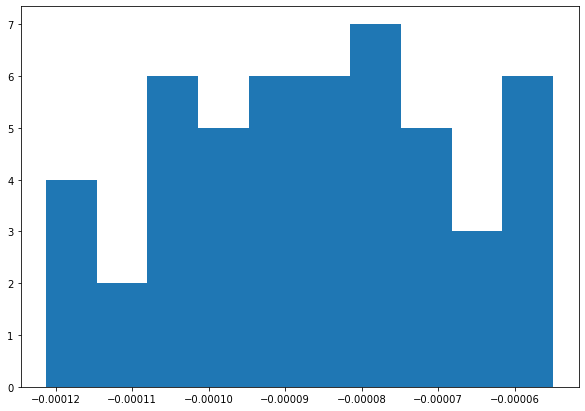

In [20]:
save = permutation_modularities(ppi,Alzheimers_subset,sample_subset,len(Alzheimers_subset[0]),50);

plot_modularity_diff(save,modularity_Alz)


# A histogram Showing the Distribution of the Difference between a Random Sample and Dementia modularity's"

/var/folders/b7/q7bwtggj2g9bfgx636fmzmqw0000gn/T/ipykernel_86668/1440404176.py:6: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  permutation = sample(merged_arr, size);


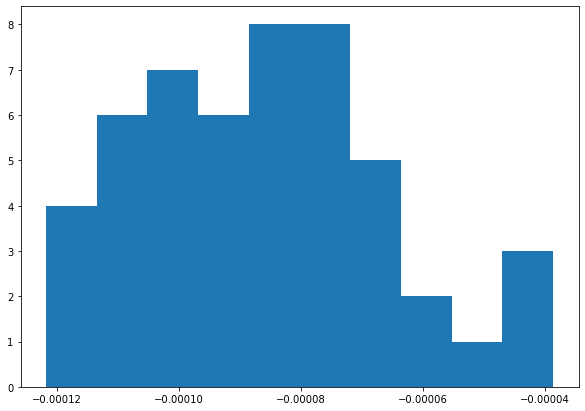

In [21]:
save = permutation_modularities(ppi,Presenile_dementia_subset,sample_subset,len(Presenile_dementia_subset[0]),50);

plot_modularity_diff(save,modularity_Dem)

# A histogram Showing the Distribution of the Difference between a Random Sample and Mental Depression Modularity"

/var/folders/b7/q7bwtggj2g9bfgx636fmzmqw0000gn/T/ipykernel_86668/1440404176.py:6: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  permutation = sample(merged_arr, size);


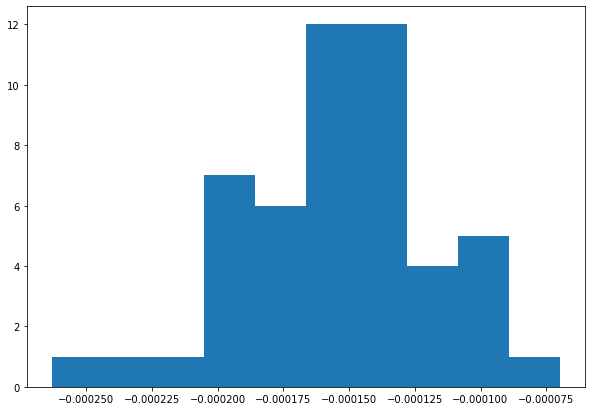

In [22]:
save = permutation_modularities(ppi,Mental_depression_subset,sample_subset,len(Mental_depression_subset[0]),50);

plot_modularity_diff(save,modularity_Depression)

# Analysis of Statistical Significance

The distributions above show a significant difference between the Disease Modularities and the Samples with random permutations.  

Based on the modularity values, the findings are consistant with the biological findings. The modularities for the diseases are distinct from the modularities of random samples by a large margin. 